In [1]:
import pandas as pd
import numpy as np

### Loading and Exploring Data

In [2]:
# Create a sample dataset
data = {
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones'],
    'Price': [999, 25, 75, 300, 150],
    'Units_Sold': [45, 120, 85, 30, 90],
    'Category': ['Electronics', 'Accessories', 'Accessories', 'Electronics', 'Audio']
}

df = pd.DataFrame(data)
print("Our Sample Dataset:")
print(df)

Our Sample Dataset:
      Product  Price  Units_Sold     Category
0      Laptop    999          45  Electronics
1       Mouse     25         120  Accessories
2    Keyboard     75          85  Accessories
3     Monitor    300          30  Electronics
4  Headphones    150          90        Audio


### Basic DataFrame Operations

In [3]:
# Display basic information
print("Dataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nFirst 3 rows:")
print(df.head(3))

# Selecting specific columns
print("\nProduct names and prices:")
print(df[['Product', 'Price']])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product     5 non-null      object
 1   Price       5 non-null      int64 
 2   Units_Sold  5 non-null      int64 
 3   Category    5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None

Basic Statistics:
            Price  Units_Sold
count    5.000000    5.000000
mean   309.800000   74.000000
std    399.020927   36.297383
min     25.000000   30.000000
25%     75.000000   45.000000
50%    150.000000   85.000000
75%    300.000000   90.000000
max    999.000000  120.000000

First 3 rows:
    Product  Price  Units_Sold     Category
0    Laptop    999          45  Electronics
1     Mouse     25         120  Accessories
2  Keyboard     75          85  Accessories

Product names and prices:
      Product  Price
0      Laptop    999
1       Mouse     25
2    Keyboard   

### Practice Exercise: Sales Calculations

In [4]:
# Calculate total revenue for each product
df['Total_Revenue'] = df['Price'] * df['Units_Sold']

# Calculate percentage of total revenue
total_company_revenue = df['Total_Revenue'].sum()
df['Revenue_Percentage'] = (df['Total_Revenue'] / total_company_revenue) * 100

print("Revenue Analysis:")
print(df[['Product', 'Total_Revenue', 'Revenue_Percentage']])

print(f"\nTotal Company Revenue: ${total_company_revenue:,.2f}")

Revenue Analysis:
      Product  Total_Revenue  Revenue_Percentage
0      Laptop          44955           58.512300
1       Mouse           3000            3.904725
2    Keyboard           6375            8.297540
3     Monitor           9000           11.714174
4  Headphones          13500           17.571261

Total Company Revenue: $76,830.00


## Data Cleaning Basics

### Handling Missing Data

In [5]:
# Create dataset with missing values
data_with_missing = {
    'Customer': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [25, np.nan, 35, 28, np.nan],
    'Satisfaction_Score': [4.5, 3.8, np.nan, 4.2, 3.9],
    'Purchase_Amount': [120, 75, 200, np.nan, 90]
}

df_missing = pd.DataFrame(data_with_missing)
print("Dataset with Missing Values:")
print(df_missing)

# Check for missing values
print("\nMissing values in each column:")
print(df_missing.isnull().sum())

# Fill missing values
df_cleaned = df_missing.copy()
df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)
df_cleaned['Satisfaction_Score'].fillna(df_cleaned['Satisfaction_Score'].median(), inplace=True)
df_cleaned['Purchase_Amount'].fillna(0, inplace=True)  # Assuming no purchase

print("\nCleaned Dataset:")
print(df_cleaned)

Dataset with Missing Values:
  Customer   Age  Satisfaction_Score  Purchase_Amount
0    Alice  25.0                 4.5            120.0
1      Bob   NaN                 3.8             75.0
2  Charlie  35.0                 NaN            200.0
3    Diana  28.0                 4.2              NaN
4      Eve   NaN                 3.9             90.0

Missing values in each column:
Customer              0
Age                   2
Satisfaction_Score    1
Purchase_Amount       1
dtype: int64

Cleaned Dataset:
  Customer        Age  Satisfaction_Score  Purchase_Amount
0    Alice  25.000000                4.50            120.0
1      Bob  29.333333                3.80             75.0
2  Charlie  35.000000                4.05            200.0
3    Diana  28.000000                4.20              0.0
4      Eve  29.333333                3.90             90.0


C:\Users\UwU\AppData\Local\Temp\ipykernel_11392\3452134572.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].mean(), inplace=True)
C:\Users\UwU\AppData\Local\Temp\ipykernel_11392\3452134572.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### Practice Exercise: Data Quality Check

In [6]:
def data_quality_report(df):
    """Generate a basic data quality report"""
    print("=== DATA QUALITY REPORT ===")
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {len(df.columns)}")
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nData Types:")
    print(df.dtypes)
    print("\nBasic Statistics:")
    print(df.describe())

# Run the report
data_quality_report(df_missing)

=== DATA QUALITY REPORT ===
Total rows: 5
Total columns: 4

Missing Values:
Customer              0
Age                   2
Satisfaction_Score    1
Purchase_Amount       1
dtype: int64

Data Types:
Customer               object
Age                   float64
Satisfaction_Score    float64
Purchase_Amount       float64
dtype: object

Basic Statistics:
             Age  Satisfaction_Score  Purchase_Amount
count   3.000000            4.000000         4.000000
mean   29.333333            4.100000       121.250000
std     5.131601            0.316228        55.733742
min    25.000000            3.800000        75.000000
25%    26.500000            3.875000        86.250000
50%    28.000000            4.050000       105.000000
75%    31.500000            4.275000       140.000000
max    35.000000            4.500000       200.000000


## Basic Data Visualization

### Creating Simple Charts

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create a bar chart of product revenue
plt.figure(figsize=(10, 6))
plt.bar(df['Product'], df['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
### Multiple Chart Types

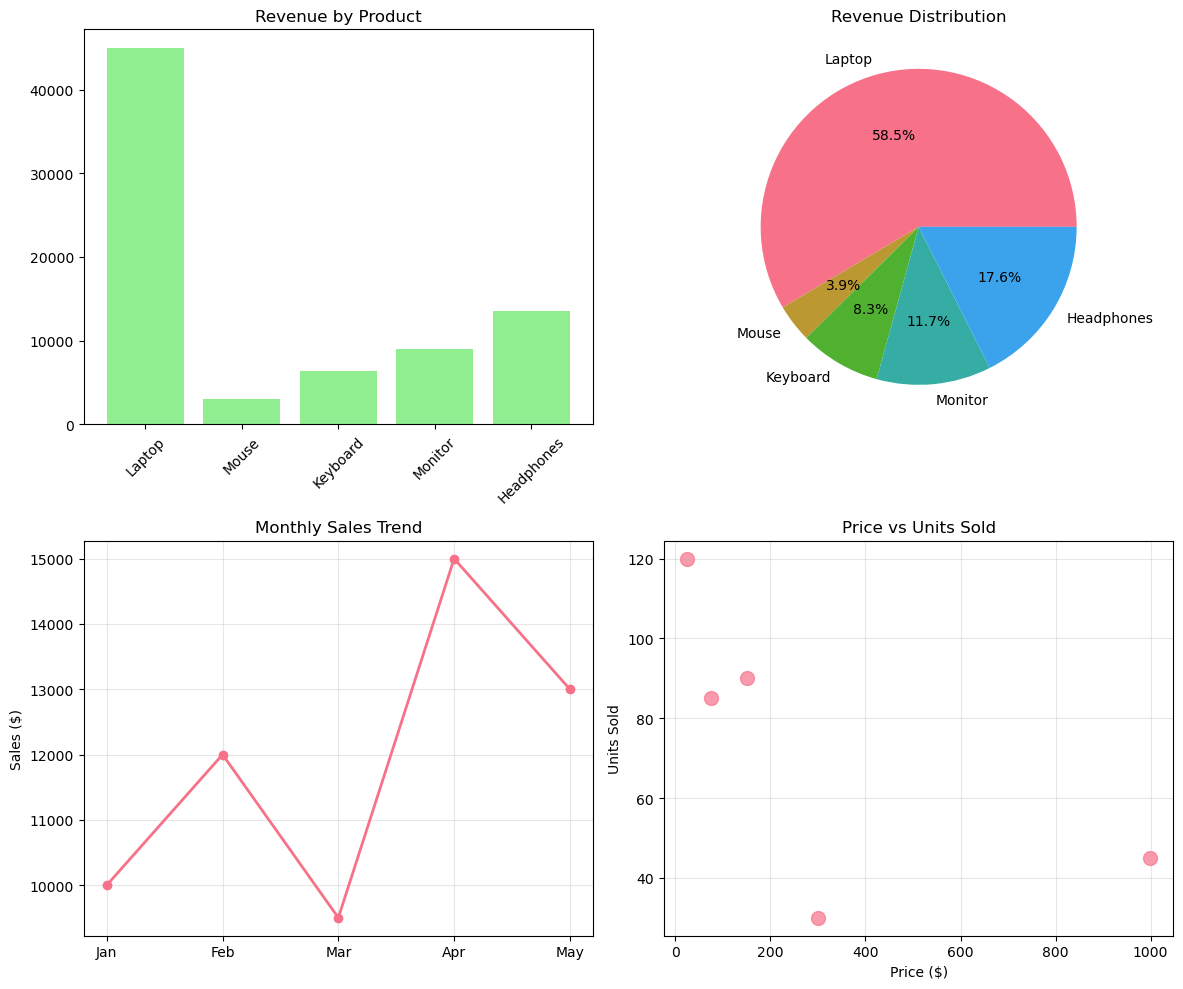

In [ ]:
# Create a 2x2 grid of different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Bar chart - Revenue by product
axes[0,0].bar(df['Product'], df['Total_Revenue'], color='lightgreen')
axes[0,0].set_title('Revenue by Product')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Pie chart - Revenue distribution
axes[0,1].pie(df['Total_Revenue'], labels=df['Product'], autopct='%1.1f%%')
axes[0,1].set_title('Revenue Distribution')

# 3. Line chart - Hypothetical monthly trend
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
monthly_sales = [10000, 12000, 9500, 15000, 13000]
axes[1,0].plot(months, monthly_sales, marker='o', linewidth=2)
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_ylabel('Sales ($)')
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter plot - Price vs Units Sold
axes[1,1].scatter(df['Price'], df['Units_Sold'], s=100, alpha=0.7)
axes[1,1].set_title('Price vs Units Sold')
axes[1,1].set_xlabel('Price ($)')
axes[1,1].set_ylabel('Units Sold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()